<a href="https://colab.research.google.com/github/Eduardo-Mati/Projetos-integrador---Desafio-unifacisa---Modelos-de-Machine-Learning/blob/main/Q6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
# Upload do datset do California Housing do Scikit-Learn

from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

In [ ]:
# Célula para instalar as bibliotecas necessárias
!pip install pandas numpy scikit-learn matplotlib seaborn xgboost tensorflow

# --- Bibliotecas para Manipulação e Análise de Dados ---
import pandas as pd
import numpy as np

# --- Bibliotecas para Visualização de Dados ---
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração para melhorar a visualização dos gráficos
sns.set_style('whitegrid')
plt.rc('figure', figsize=(10, 6))

# --- Pré-processamento e Divisão dos Dados ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Para padronizar os dados

# --- Modelo Linear ---
from sklearn.linear_model import LinearRegression

# --- Métricas de Avaliação ---
from sklearn.metrics import mean_squared_error, r2_score

# --- XGBoost ---
import xgboost as xgb

# --- Rede Neural Artificial com TensorFlow/Keras ---
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input



In [75]:
df = california_housing.frame

In [76]:
df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


📊 Tradução das variáveis

--MedInc → Median Income → Renda mediana na região (em dezenas de milhares de dólares).

HouseAge → Idade média das casas na região (em anos).

AveRooms → Média de cômodos por casa (Average Rooms).

AveBedrms → Média de quartos por casa (Average Bedrooms).

--Population → População total da região.

AveOccup → Ocupação média por residência (Average Occupancy).

Latitude → Latitude da localização (coordenada geográfica).

Longitude → Longitude da localização (coordenada geográfica).

MedHouseVal → Median House Value → Valor mediano das casas na região (em centenas de milhares de dólares). É a variável alvo (target).

In [78]:
# Normalizando variáveis
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [79]:
df_scaled.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,2.129631
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,1.314156
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,1.258693
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,1.165100
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,1.172900
5,0.087447,1.856182,-0.269730,0.014669,-0.894071,-0.089618,1.038503,-1.337818,0.544611
6,-0.111366,1.856182,-0.200918,-0.306633,-0.292712,-0.090725,1.033821,-1.337818,0.800259
7,-0.395137,1.856182,-0.255232,-0.073542,-0.237079,-0.123476,1.033821,-1.337818,0.299362
8,-0.942359,1.061601,-0.458703,0.044254,-0.193810,-0.100499,1.033821,-1.342809,0.171971
9,-0.094470,1.856182,-0.185283,-0.224687,0.110844,-0.086501,1.033821,-1.337818,0.470083


In [80]:
# Observando as correlações de variáveis
def plot_corr(df_scaled, size=35):
    corr = df_scaled.corr()
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

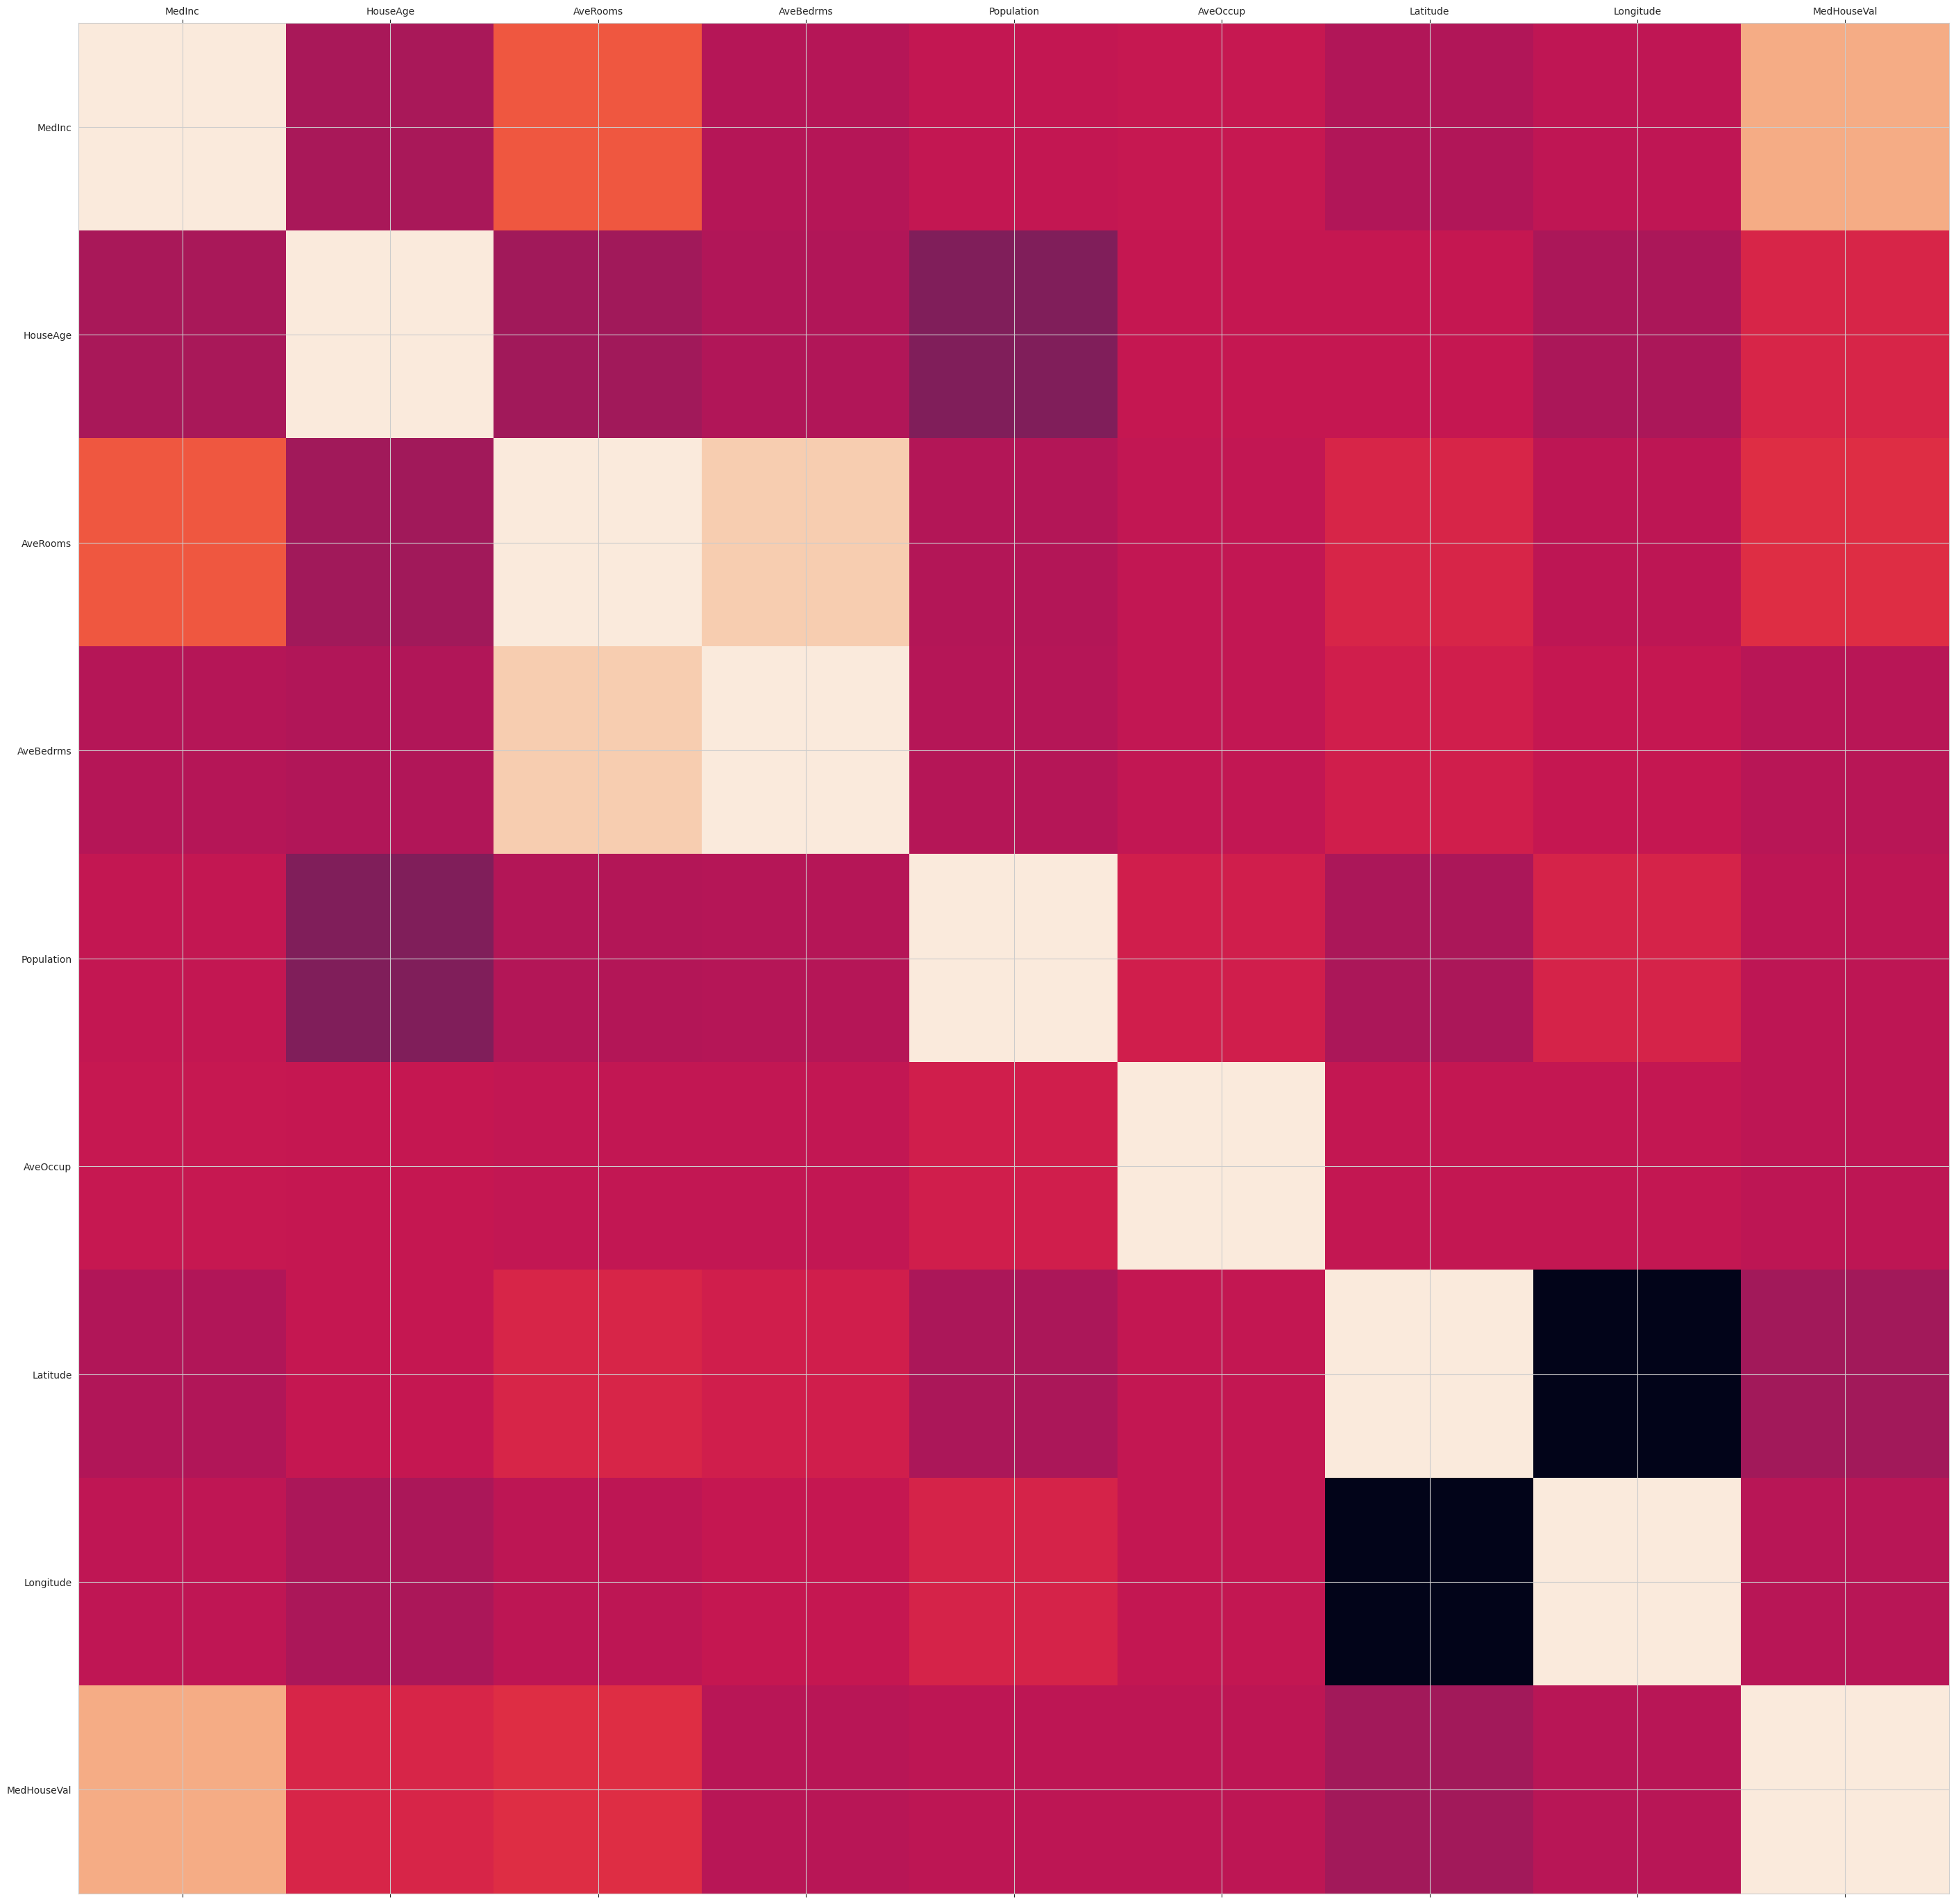

In [81]:
plot_corr(df_scaled)

In [83]:
# Definindo os valores de features e terget em x e y
X = df_scaled.iloc[:, :-1]
y = df_scaled.iloc[:, -1]

In [84]:
# Dividindo os dados em conjuntos de treino e validação
x_treino, x_val, y_treino, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
# Imprimindo os resultados
print("{0:0.2f}% nos dados de treino".format((len(x_treino)/len(X)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(x_val)/len(X)) * 100))

80.00% nos dados de treino
20.00% nos dados de teste


In [86]:
# Aplicando o modelo de regressão linear
regressor = LinearRegression()
regressor.fit(x_treino, y_treino)

LinearRegression()

In [87]:
# Aplicando o modelo de avaliação do RMSE
y_pred = regressor.predict(x_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print("RMSE:", rmse)

RMSE: 0.6461245859158664


In [88]:
# Aplicando modelo R²
r2 = r2_score(y_val, y_pred)
print("R²:", r2)

R²: 0.575787706032451


----------------------------------------------------------------------------------------------------------------------------------------------------------------

In [89]:
# Aplicando algoritimo XGboost
xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(x_treino, y_treino)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [90]:
# Aplicando o modelo de avaliação do RMSE
y_pred = xgb_regressor.predict(x_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print("RMSE:", rmse)

RMSE: 0.40885938329846216


In [91]:
# Aplicando modelo R²
r2 = r2_score(y_val, y_pred)
print("R²:", r2)

R²: 0.8301370526941086


------------------------------------------------------------------------------------------------

In [92]:
# Aplicando algoritmo de regressão de redes neurais artificiais
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(x_treino.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [94]:
# Aplicando o modelo de avaliação do RMSE
model.compile(optimizer='adam', loss='mse')
history = model.fit(x_treino, y_treino, epochs=100, batch_size=32, verbose=0)

mse = model.evaluate(x_val, y_val, verbose=0)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 0.4389227485203987


In [95]:
# Aplicando modelo R²
y_pred = model.predict(x_val)
r2 = r2_score(y_val, y_pred)
print("R²:", r2)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
R²: 0.804238652419358


----------------------------------------------------------------------------------------------------------------------------------------------------------------

Pergunta: Qual modelo teve menor erro de previsão? Como otimizar ainda mais o desempenho?


-O modelo com menor erro de previsão foi o XGboost, de apenas 40% do RMSE, e uma taxa de previsão boa de 83% do R²

-Para melhorar o desempenho seria necessário ter mais informações e detalhes necessários para melhorar os outros algoritimos de regressão, o que não será necessário para o XGboost, que já atingiu um nível adequado.